In [1]:
# 训练随机森林回归模型 RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

boston = datasets.load_boston()
features = boston.data[:, 0:2]
target = boston.target
# 训练模型   bootstrap 表示是够有放回抽样，还是不放回抽样
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)
model = randomforest.fit(features, target)

In [3]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from gplearn import genetic
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ensemble  # ensemble learning: 集成学习
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [5]:
features

array([[6.3200e-03, 1.8000e+01],
       [2.7310e-02, 0.0000e+00],
       [2.7290e-02, 0.0000e+00],
       ...,
       [6.0760e-02, 0.0000e+00],
       [1.0959e-01, 0.0000e+00],
       [4.7410e-02, 0.0000e+00]])

In [7]:
features=pd.DataFrame(features)
features

,0,1
0,0.00632,18.0
1,0.02731,0.0
2,0.02729,0.0
3,0.03237,0.0
4,0.06905,0.0
...,...,...
501,0.06263,0.0
502,0.04527,0.0
503,0.06076,0.0
504,0.10959,0.0


In [8]:
target=pd.DataFrame(target)
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [9]:
#读取原数据集的特征和目标值
X = features.values[:, :-1]
y = features.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])

for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [16]:
#计算准确率xgboost
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)
clf = randomforest.fit(features, target)
clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

D:\ProgramData\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R2: 0.1735127746668207
RMSE: 21.781239015359475
r: (0.44195016787223096, 3.3156527663142347e-06)
MAE: 11.32785014005602
R2b: 0.015610897375148203
MSE: 474.42237304421775


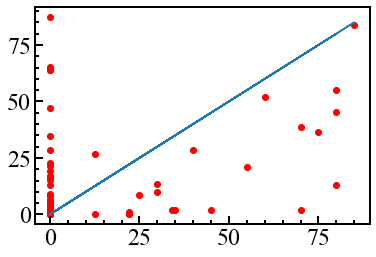

In [17]:
#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()

R2: 0.48242482217353055
RMSE: 17.236585109503828
r: (0.6225983700538547, 2.8242154854050864e-12)
MAE: 10.452892032398413
R2b: 0.3835411495487968
MSE: 297.09986623716907


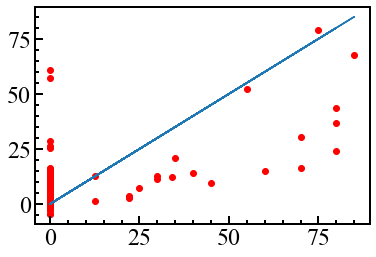

In [18]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', activation='relu', learning_rate_init=0.01,alpha=0.0001,max_iter=200000, hidden_layer_sizes=(200,200))

clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()

In [20]:
# 训练随机森林回归模型 RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

boston1 = datasets.load_boston()
features = boston1.data[:, :-1]
target = boston1.target
features=pd.DataFrame(features)
features

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45


In [23]:
target = boston1.data[:, -1]
target=pd.DataFrame(target)
target

,0
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


In [25]:
target=pd.DataFrame(boston1.target)
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [37]:
features=pd.DataFrame(boston1.data)
features

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [36]:
target=pd.DataFrame(boston1.target)
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


R2: 0.4780598193868397
RMSE: 17.309115420173107
r: (0.620737068000588, 3.420144857780071e-12)
MAE: 10.673244041606885
R2b: 0.37834220509516236
MSE: 299.6054766288744


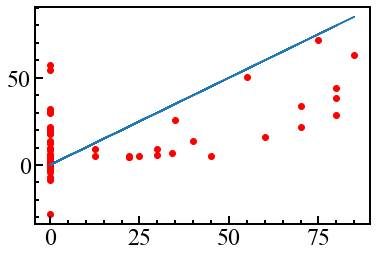

In [38]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(solver='lbfgs', activation='relu', learning_rate_init=0.01,alpha=0.0001,max_iter=200000, hidden_layer_sizes=(200,200))

clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


R2: 0.19231935384878707
RMSE: 21.531998768080328
r: (0.20494811325981244, 0.03879517019482068)
MAE: 15.42181276397776
R2b: 0.038010507480332856
MSE: 463.62697094861284


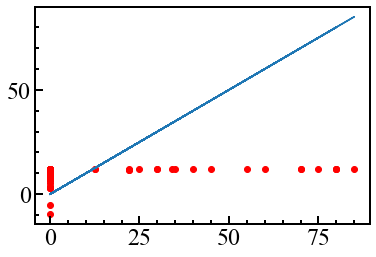

In [39]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor()

clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()

In [42]:
from sklearn.svm import LinearSVR
lr = LinearSVR() #实例化一个线性回归对象
lr.fit(X_train, y_train) #采用fit方法，拟合回归系数和截距
print(lr.intercept_)   #输出截距
print(lr.coef_)   #输出系数   可分析特征的重要性以及与目标的关系
y_pred = lr.predict(X_test)#模型预测
print("R2=",r2_score(y_test, y_pred))#模型评价, 决定系数
#print("mse=",mean_squared_error(y_test, y_pred))#均方误差
#print(lr.intercept_)  #输出截距


[0.00010195]
[-0.00041145]
R2= -0.19349271301256343


In [43]:
import time
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
    
model=LinearRegression()
start=time.time()
model.fit(X_train,y_train)
train_score=model.score(X_train,y_train)
cv_score=model.score(X_test,y_test)
print(time.time()-start,train_score,cv_score)

0.0030083656311035156 0.041229984247387996 0.015674796791212864
